In [1]:
# Import necessary libraries
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.applications import MobileNet
from matplotlib import pyplot as plt

In [2]:
# Set the path to your dataset
train_path = '/content/drive/MyDrive/DataSet/train'
valid_path = '/content/drive/MyDrive/DataSet/validation'
test_dir = '/content/drive/MyDrive/DataSet/test'

In [8]:
# Set the image size
img_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_path))
epochs = 30

In [9]:
# set up the data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, #randomly applies shear transformation to the images
                                   zoom_range=0.2, #randomly zooms into the images
                                   horizontal_flip=True, #randomly flips the images horizontally
                                   vertical_flip=True, #randomly flips the images vertically
                                   rotation_range=20, #randomly rotates the images within 20 degrees
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest',
                                   brightness_range=[0.5, 1.5]
                                  )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 973 images belonging to 5 classes.
Found 124 images belonging to 5 classes.


In [10]:
# Load MobileNet model
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=img_size + (3,))

In [11]:
# Freeze pre-trained layers
for layer in mobilenet.layers:
    layer.trainable = False

# Add custom layers to the model
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with an Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

# Save the model
model.save('/content/drive/MyDrive/Trained_Models/MobileNet-Modi.h5')

Epoch 1/30
30/30 [==============================] - 221s 7s/step - loss: 0.3320 - accuracy: 0.8927 - val_loss: 0.1996 - val_accuracy: 0.9271
Epoch 2/30
30/30 [==============================] - 123s 4s/step - loss: 0.2138 - accuracy: 0.9447 - val_loss: 0.1751 - val_accuracy: 0.9479
Epoch 3/30
30/30 [==============================] - 123s 4s/step - loss: 0.1763 - accuracy: 0.9469 - val_loss: 0.1578 - val_accuracy: 0.9583
Epoch 4/30
30/30 [==============================] - 113s 4s/step - loss: 0.1662 - accuracy: 0.9501 - val_loss: 0.1271 - val_accuracy: 0.9792
Epoch 5/30
30/30 [==============================] - 117s 4s/step - loss: 0.1356 - accuracy: 0.9617 - val_loss: 0.1645 - val_accuracy: 0.9479
Epoch 6/30
30/30 [==============================] - 115s 4s/step - loss: 0.1230 - accuracy: 0.9671 - val_loss: 0.1250 - val_accuracy: 0.9583
Epoch 7/30
30/30 [==============================] - 122s 4s/step - loss: 0.1105 - accuracy: 0.9617 - val_loss: 0.1907 - val_accuracy: 0.9479
Epoch 8/30
30

In [14]:
s = model.evaluate(train_generator, verbose=0)
print("Train Accuracy: %.2f%%" % (s[1]*100))

Train Accuracy: 98.56%


In [ ]:
# Evaluate model on test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 42 images belonging to 4 classes.


In [ ]:
s = model.evaluate(test_generator, verbose=0)
print("Test Accuracy: %.2f%%" % (s[1]*100))

Test Accuracy: 90.48%


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

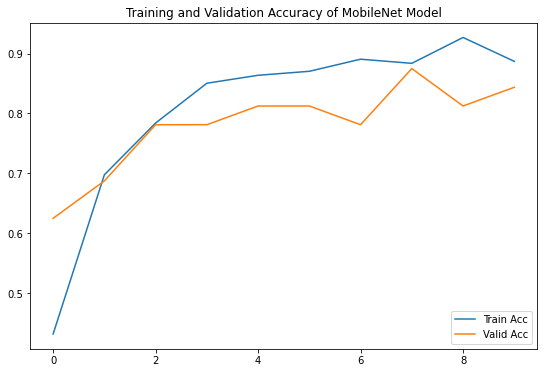

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Train Acc')
plt.plot(range(epochs), val_acc, label='Valid Acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of MobileNet Model')
plt.show()

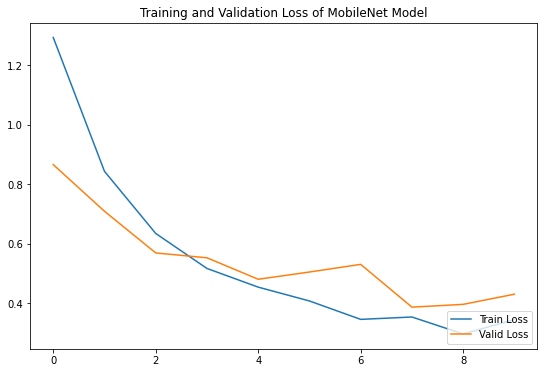

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Valid Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss of MobileNet Model')
plt.show()